In [1]:
 # Проект "Pharaoh как ключевая фигура отечественной рэп-сцены"

In [3]:
 # Цель проекта: составиль образ рэпера Pharaoh, формируемого его официальной группой Вконтакте (deaddynasty)

In [80]:
import vk

In [81]:
!pip install vk

In [82]:
token = ""  
session = vk.Session(access_token=token)  
vk_api = vk.API(session)

In [83]:
personal_token = "" 
session = vk.Session(access_token=personal_token) 
vk_personal_api = vk.API(session)  

In [9]:
def get_members(groupid, fields=('sex', 'bdate', 'city', 'country', 'domain')):
    first = vk_api.groups.getMembers(group_id=groupid, fields=fields, v=5.92)  
    data = first["items"]  
    count = first["count"] // 1000  
    for i in range(1, count+1):  
        data = data + vk_api.groups.getMembers(group_id=groupid, fields=fields, v=5.92, offset=i*1000)["items"]
    return data

members = get_members("deaddynasty") 
print (len (members))

853016


In [6]:
def save_members_to_file(filename, members):
    with open(filename, 'w', encoding='utf-8') as f:
        for member in members:
            _id = member["id"] 
            first_name = member["first_name"] 
            last_name = member["last_name"] 
            
            sex = member["sex"] 
            if int(sex) == 1:  
                sex = "F"  
            elif int(sex) == 2:  
                sex = "M" 
            else:  
                sex = "-"  
                
            bdate = member.get('bdate', "-")   
            if len(bdate.split(".")) == 3:  
                bdate = bdate.split(".")[-1]  
            else:  
                bdate = "-"  
                
            city = member.get('city', {}).get("title", "-")  
            country = member.get('country', {}).get("title", "-")  
            f.write(f"{_id},\t{first_name}\t{last_name}\t{sex}\t{bdate}\t{city}\t{country}\n")  
            
save_members_to_file ("saved_members.tsv", members) 

In [ ]:
 # Задачи проекта:

In [ ]:
 # 1. Определить географическую карту слушателей Pharaoh (города, страны).

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
df = pd.read_csv("saved_members.tsv", sep="\t", names=["id", "name", "surname", "sex", "birth", "city", "country"])

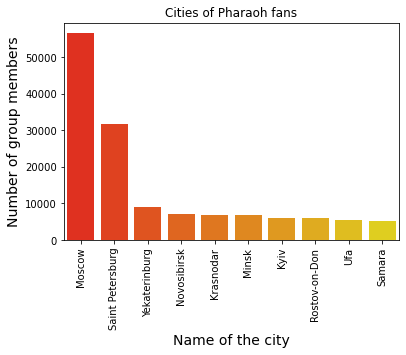

In [28]:
city_count  = df['city'].value_counts().drop('-') 
city_count = city_count[:10]
sns.barplot(city_count.index, city_count.values, palette='autumn')
plt.title('Cities of Pharaoh fans')
plt.ylabel('Number of group members', fontsize=14)
plt.xlabel('Name of the city', fontsize=14)
plt.xticks(rotation=90)
plt.savefig("my_plot.png", dpi=1000)

In [ ]:
# Исходя из построенного графика, показывающего города, где наибольшее количество людей является слушателями Pharaoh, можно сказать, что тройкой лидеров в данном случае являются Москва (более 50000 человек), Санкт-Петербург (более 30000), Екатеринбург (чуть менее 10000).

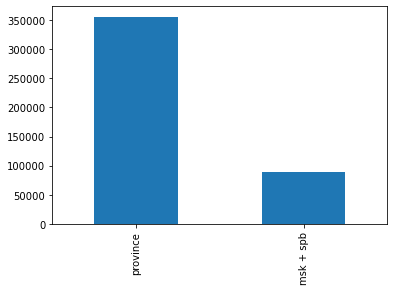

In [49]:
df.loc[(df['city'] == 'Moscow')] = "msk + spb"
df.loc[(df['city'] == 'Saint Petersburg')] = "msk + spb"
df.loc[(df['city'] != "msk + spb") & (df['city'] != "-")] = "province"


city_count  = df['city'].value_counts().drop('-') 
city_count = city_count[:20] 

axes = city_count.plot.bar() 

In [ ]:
# Несмотря на то, что Мск и Спб являютсялидерами в предыдущем графике по готодам-слушателям Pharaoh (суммарно аудитория составляет окоо 100000 человек), по этому графику мы видим, что Мск+Спб меньше провинции в 3,5 раза.

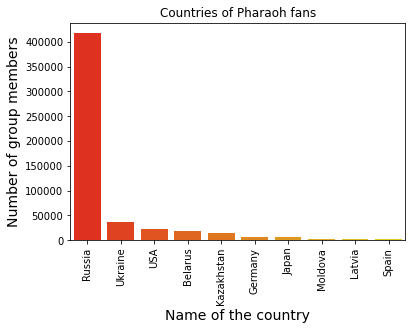

In [29]:
country_count  = df['country'].value_counts().drop('-') 
country_count = country_count[:10]
sns.barplot(country_count.index, country_count.values, palette='autumn')
plt.title('Countries of Pharaoh fans')
plt.ylabel('Number of group members', fontsize=14)
plt.xlabel('Name of the country', fontsize=14)
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Исходя из построенного графика, показывающего страны, где наибольшее количество людей является слушателями Pharaoh, можно сказать, что, безусловно, первое место занимает Россия (более 400000), в остальных странах, среди которых особенно неожиданно увидеть США, Японию, Молдову и др.,аудитория составляет менее 50000 человек.

In [30]:
 # 2. Проанализировать аудиторию выбранного паблика (возраст, пол).

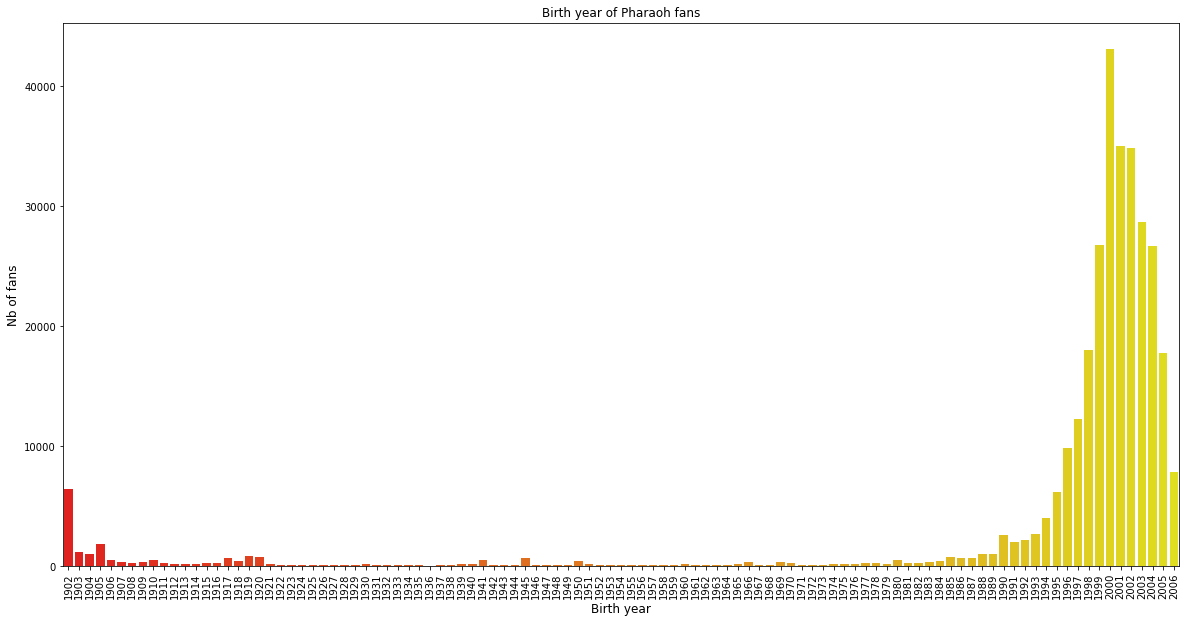

In [31]:
birth_count  = df['birth'].value_counts().drop("-")
plt.figure(figsize=(20,10))
ax = sns.barplot(birth_count.index, birth_count.values, palette='autumn')
plt.title('Birth year of Pharaoh fans')
plt.ylabel('Nb of fans', fontsize=12)
plt.xlabel('Birth year', fontsize=12)
plt.xticks(rotation=90)
plt.show()

In [ ]:
 # График показывает, что год, в который родилась наибольшее количество слушателей Pharaoh (более 40000) - 2000, то есть их возраст на 2020 год составляет 20 лет. Интересно, что 14-летних почти в 2 раза меньше, чем 15-летних, с каждым годом цифра увеличивается почти в два раза, а с 20 лет, начинает падать, также, примерно в 2 раза.

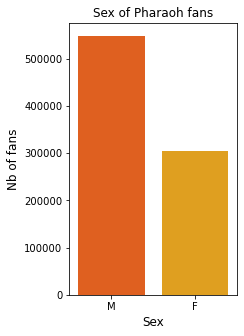

In [32]:
sex_count  = df['sex'].value_counts().drop("-")
plt.figure(figsize=(3,5))
ax = sns.barplot(sex_count.index, sex_count.values, palette='autumn')
plt.title('Sex of Pharaoh fans')
plt.ylabel('Nb of fans', fontsize=12)
plt.xlabel('Sex', fontsize=12)
plt.xticks(rotation=360)
plt.show()

In [ ]:
# Самый неожиданный результат получен при анализе пола слушателей Pharaoh: М (более 50000) почта в два раза больше, чем Ж (30000).

In [ ]:
# 3. Проанализировать публикуемые посты паблика (длина, слова).

In [58]:
def get_posts(owner_id):
    first = vk_api.wall.get(domain=owner_id, count=100, filter="owner", v=5.124)
    data = first["items"]  
    count = first["count"] // 100  
    
 
    for i in range(1, count+1):  
        data += vk_api.wall.get(domain=owner_id, v=5.124, filter="owner", count=100, offset=i*100)["items"]
    return [i['text'] for i in data]

posts = get_posts("deaddynasty")
print (posts)

['[id414611893|PHARAOH] — Правило \n\nlisten: https://bnd.lc/pravilo\n\nPresented by Dead Dynasty \nexecutive produced by: \nVadim [club55793030|BRYTE] Chernyshev \nGleb [club63530169|PHARAOH] Golubin \n[club193433111|Dima Roux] \nIvan [club43802990|STEREORYZE] Nezhentsev \nSergei Shpul \nAndrey [club86086120|PRPL] Ignatyev \nPavel [club82582033|MEEP] Sochnev \nMaxim [club68539683|MNOGOZNAAL] Lazin \nTrash Beats', '', '[club193433111|Dima Roux] feat. PHARAOH - Пойми\n\nfull ep: vk.cc/ayIgkl', '', 'Красава 🔝', '🤯', '', 'флоу на лям бачей, но он небрежный', '🤞', 'HAPPY BIRTHDAY, DEAD DYNASTY🍾 !', '[club30314549|ЛСП] & [id414611893|PHARAOH] — «Амнезия»\n\nart: [club86086120|PRPL]\nслушать и вникать: band.link/lsp_phar', '📸🏆 @ VTB ARENA', '', '[club55259393|DIMVRS] и PHARAOH рассказали для [club170229664|PRODUCER LAYUP] как создавался бит «Мой Кайф» с микстейпа «PHUNERAL».', 'Возвращение живых мертвецов, s02.\nМосква.\n\nph: [id378725445|Vika Sheremet]', 'Возвращение живых мертвецов.\nМоск

In [59]:
posts = get_posts("deaddynasty")

from pymystem3 import Mystem

http_pattern = re.compile(r"https://.+\b")
user_tag_pattern = re.compile(r"\[.+?\]")

def clean_text(text):
    
    text = re.sub(http_pattern, "WEBLINK", text)
    text = re.sub(user_tag_pattern, "USERTAG", text)
    text = text.replace("\n", " ")
    return text

with open("posts.txt", 'w', encoding="utf-8") as f:
    for post in posts:
        cleaned = clean_text(post)
        f.write(cleaned+"\n")

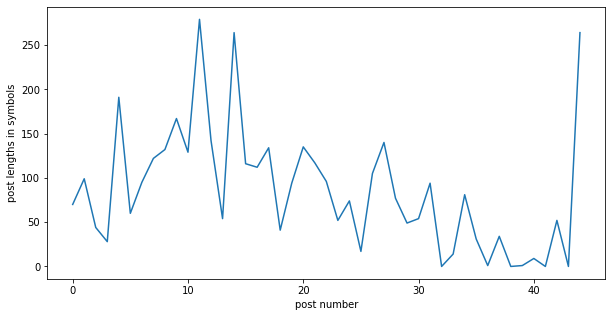

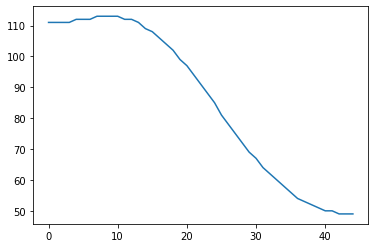

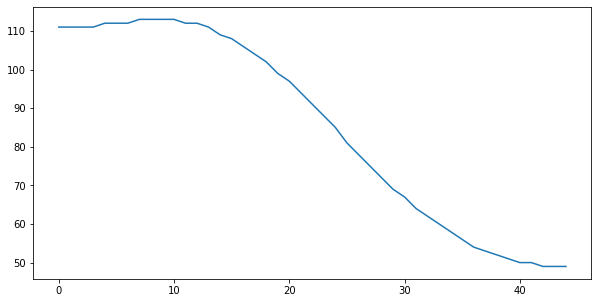

In [75]:
post_lengths = []

with open("posts.txt", 'r', encoding='utf-8') as f:
    for line in f:
        post_lengths.append(len(line.strip()))
        
post_lengths = list(reversed(post_lengths))

plt.figure(figsize=(10,5)) 
plt.plot(post_lengths)
plt.ylabel('post lengths in symbols')
plt.xlabel('post number')
plt.show()


from scipy.ndimage.filters import gaussian_filter1d

ysmoothed = gaussian_filter1d(post_lengths, sigma=10)
plt.plot(ysmoothed)
plt.show()

plt.figure(figsize=(10,5)) 
plt.plot(ysmoothed)
plt.savefig("my_plot.png", dpi=1000) 

In [ ]:
# Построив, сгладив и сохранив график, мы можем проследить по нему, как менялась длина постов в выбранной группе. Мы видим, что она начиналась с 110 и сейчас где-то на 50, сокращение длины постов почти более, чем в 2 раза.

In [88]:
from nltk.tokenize import word_tokenize
import re

In [89]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [90]:
from nltk.tokenize import word_tokenize
from collections import Counter

In [92]:
with open("posts.txt", 'r', encoding='utf-8') as f:
    texts = f.read().lower()

In [93]:
words = word_tokenize(texts)
len(words)

647

In [94]:
words = [i for i in words if i.isalnum()]
len(words)

405

In [95]:
with open("stopwords_russian.txt", 'r', encoding="utf-8") as f:
    stop_words = f.read().lower().split("\n")
    stop_words = set(stop_words)

In [96]:
clean_words = [word for word in words if word not in stop_words]

In [97]:
print(f"Было: {len(words)}, Стало: {len(clean_words)}")

Было: 405, Стало: 360


In [98]:
Counter(clean_words).most_common(30)

[('usertag', 82),
 ('by', 14),
 ('deaddynasty', 14),
 ('pharaoh', 12),
 ('weblink', 10),
 ('облако', 10),
 ('prod', 7),
 ('скачать', 5),
 ('mixed', 5),
 ('yungrussia', 4),
 ('москве', 4),
 ('twitter', 4),
 ('feat', 3),
 ('ph', 3),
 ('пути', 3),
 ('билеты', 3),
 ('тура', 3),
 ('концерт', 3),
 ('phlora', 3),
 ('dead', 2),
 ('full', 2),
 ('art', 2),
 ('phuneral', 2),
 ('возвращение', 2),
 ('живых', 2),
 ('мертвецов', 2),
 ('coming', 2),
 ('soon', 2),
 ('unplugged', 2),
 ('музыка', 2)]

In [ ]:
# Здесь важно отметить, что название объединения, в котором состоит Pharaoh - deaddynasty - 14 раз, встречается чаще, чем его творческий псевдоним - 12 упоминаний. Это наблюение будет важно для основного вывода проекта.